In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def jaccard_sim(a, b):
    union = set(a).union(set(b))
    intersection = set(a).intersection(set(b))
    
    return len(intersection)/len(union)

### 명시된 배차 간격이 동일한 버스들끼리 grouping

In [9]:
route_group_by_interval_time = dict() # {10: [# 배차 간격이 10분인 버스 ids]}

In [10]:
route_info_df = pd.read_csv('../csv/route_info.csv', index_col=0)
route_info_df

,routeid,routeno,startnodenm,startvehicletime,endnodenm,endvehicletime,intervaltime
0,CAB285000006,11,두정우성아파트,605,두정우남아파트,2230,10
1,CAB285000007,11,두정우남아파트,610,두정한성아파트,2230,10
2,CAB285000008,12,방아다리공원,604,부영아파트,2230,7
3,CAB285000009,12,부영아파트,605,방아다리공원,2222,7
4,CAB285000010,13,단대병원,600,천안아산역,2230,11
5,CAB285000011,13,천안아산역,605,단대병원,2245,11
6,CAB285000012,14,방아다리공원,600,백석대학교(운동장),2220,10
7,CAB285000013,14,백석대학교(운동장),610,방아다리공원,2215,10
8,CAB285000024,24,각원사,610,동우아파트,2230,20
9,CAB285000025,24,동우아파트,620,각원사,2225,20


In [13]:
for i in range(len(route_info_df)):
    if route_info_df.iloc[i, 6] not in route_group_by_interval_time:
        route_group_by_interval_time[route_info_df.iloc[i, 6]] = list()
    route_group_by_interval_time[route_info_df.iloc[i, 6]].append(route_info_df.iloc[i, 0])
    
route_group_by_interval_time

{10: ['CAB285000006', 'CAB285000007', 'CAB285000012', 'CAB285000013'],
 7: ['CAB285000008', 'CAB285000009'],
 11: ['CAB285000010', 'CAB285000011'],
 20: ['CAB285000024', 'CAB285000025', 'CAB285000293', 'CAB285000294']}

### Compute path similarity using Jaccard Similarity

In [14]:
node_id_df = pd.read_csv('../csv/all_node_ids.csv', index_col=0)
node_id_df

,routeid,node_ids
0,CAB285000006,"['CAB285000930', 'CAB285000928', 'CAB285000926..."
1,CAB285000007,"['CAB285001033', 'CAB285001031', 'CAB285001035..."
2,CAB285000008,"['CAB285010020', 'CAB285000873', 'CAB285000872..."
3,CAB285000009,"['CAB285000784', 'CAB285000780', 'CAB285001969..."
4,CAB285000010,"['CAB285000640', 'CAB285000641', 'CAB285000642..."
5,CAB285000011,"['CAB288002022', 'CAB288002048', 'CAB288002219..."
6,CAB285000012,"['CAB285010020', 'CAB285000873', 'CAB285000872..."
7,CAB285000013,"['CAB285001598', 'CAB285001597', 'CAB285002282..."
8,CAB285000024,"['CAB285001045', 'CAB285001044', 'CAB285002190..."
9,CAB285000025,"['CAB285010146', 'CAB285000318', 'CAB285000317..."


[[1.         0.02409639 0.01369863 0.02777778]
 [0.02409639 1.         0.02816901 0.        ]
 [0.01369863 0.02816901 1.         0.        ]
 [0.02777778 0.         0.         1.        ]]
======== [ end comparing of interval group10 ]
[[1.         0.02409639]
 [0.02409639 1.        ]]
======== [ end comparing of interval group7 ]
[[1.         0.02409639]
 [0.02409639 1.        ]]
======== [ end comparing of interval group11 ]
[[1.         0.02409639 0.01369863 0.02777778]
 [0.02409639 1.         0.02816901 0.        ]
 [0.01369863 0.02816901 1.         0.        ]
 [0.02777778 0.         0.         1.        ]]
======== [ end comparing of interval group20 ]


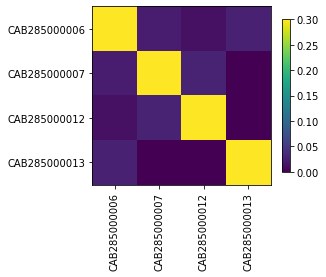

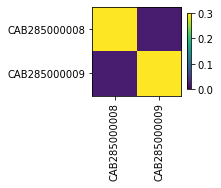

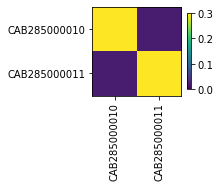

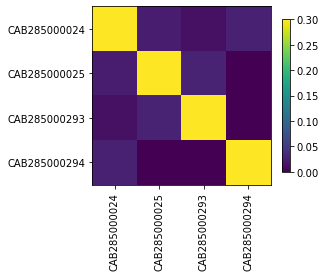

In [49]:
for interval_time, bus_list in route_group_by_interval_time.items():
    group_path_sim = list()
    for i in range(len(bus_list)):
        group_path_sim.append(list())
        curr_bus_node_ids_str = node_id_df.loc[i, 'node_ids'] # extract node_ids from node_id_df
        curr_bus_node_ids = curr_bus_node_ids_str[1:-1].replace("'", "").split(', ') # str -> str arrary
        
        for j in range(len(bus_list)):
            comp_bus_node_ids_str = node_id_df.loc[j, 'node_ids'] # extract node_ids from node_id_df
            comp_bus_node_ids = comp_bus_node_ids_str[1:-1].replace("'", "").split(', ') # str -> str arrary
            
            # Compute path similarity
            path_sim = jaccard_sim(curr_bus_node_ids, comp_bus_node_ids)
            group_path_sim[i].append(path_sim)
    
    # Draw graph
    group_path_sim_T = np.transpose(group_path_sim) # temp = group_path_sim.T
    print(group_path_sim_T)
    
    fig = plt.figure(figsize=[len(bus_list), len(bus_list)])
    plt.imshow(group_path_sim_T, interpolation='none', vmin=0, vmax=0.3)
    plt.colorbar(shrink=0.7)
    plt.xticks(range(len(bus_list)), bus_list, rotation=90, ha='center')
    plt.yticks(range(len(bus_list)), bus_list)
    
    # save graph
    plt.savefig('../image/path_similarity_interval_'+str(interval_time)+'.png')

    print('======== [ end comparing of interval group{} ]'.format(interval_time))